# Match Prediction

##### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

##### Reading Dataset

In [366]:
matches = pd.read_csv("matches.csv")
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [367]:
matches.drop(["id","date","dl_applied","city","umpire1","umpire2","umpire3"],axis = 1, inplace = True )

In [368]:
matches.head(10)

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
5,2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4,N Rana,Wankhede Stadium
7,2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
8,2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
9,2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium


In [369]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [370]:
matches.head()

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


###### DC VS MI matches

In [438]:
DM=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Mumbai Indians'))]

In [439]:
DM.shape

(24, 11)

In [440]:
DM.head()

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
23,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium
43,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla
81,2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy
108,2008,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla
149,2009,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,Delhi Capitals,0,7,A Nehra,Buffalo Park


In [432]:
def avg_win_by_runs_and_wickets_of_a_team_while_defending_and_chasing( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('number_of_times_given_team_win_while_defending :' , number_of_times_given_team_win_while_defending ) 
            print('number_of_times_given_team_win_while_chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('average_runs_by_which_a_given_team_wins_while_defending  : ' ,average_runs_by_which_a_given_team_wins_while_defending )
            print('average_wickets_by_which_a_given_team_wins_while_chasing : ' ,average_wickets_by_which_a_given_team_wins_while_chasing)

In [433]:
avg_win_by_runs_and_wickets_of_a_team_while_defending_and_chasing("Mumbai Indians",DM)

number_of_times_given_team_win_while_defending : 10
number_of_times_given_team_win_while_chasing   : 2

average_runs_by_which_a_given_team_wins_while_defending  :  53.7
average_wickets_by_which_a_given_team_wins_while_chasing :  6.5


In [434]:
avg_win_by_runs_and_wickets_of_a_team_while_defending_and_chasing("Delhi Capitals",DM)

number_of_times_given_team_win_while_defending : 5
number_of_times_given_team_win_while_chasing   : 7

average_runs_by_which_a_given_team_wins_while_defending  :  26.4
average_wickets_by_which_a_given_team_wins_while_chasing :  6.428571428571429


Text(0.5, 1.0, 'DC VS MI - head to head')

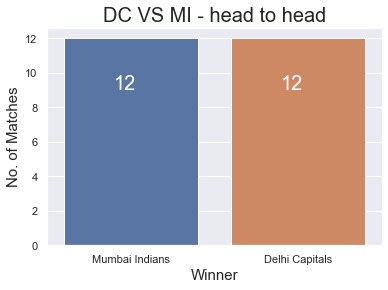

In [379]:
sns.countplot(DM["winner"])
plt.text(-0.1,9,str(DM['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.text(0.9,9,str(DM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('DC VS MI - head to head',fontsize = 20)

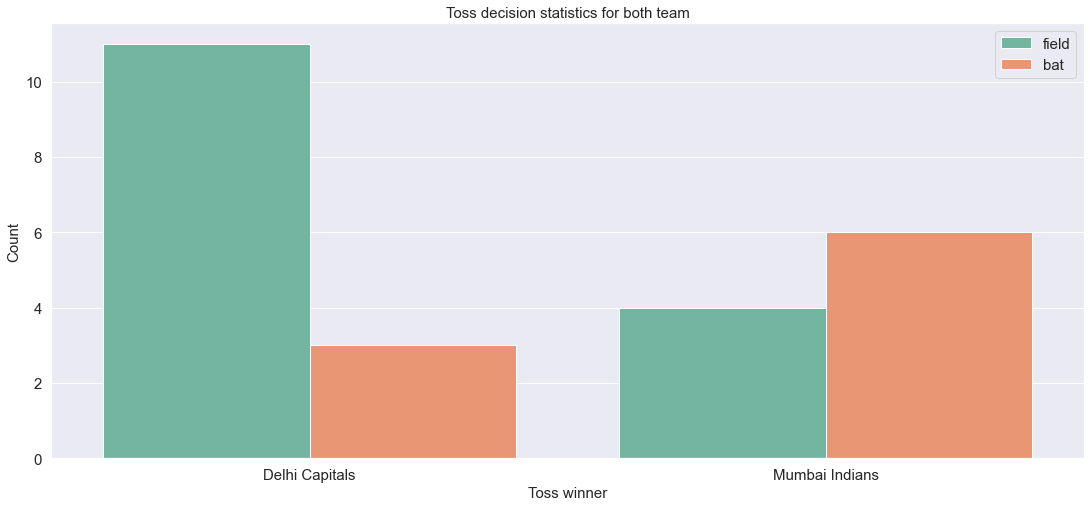

In [396]:
#Overall Scenerio from beginning

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(DM['toss_winner'],palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

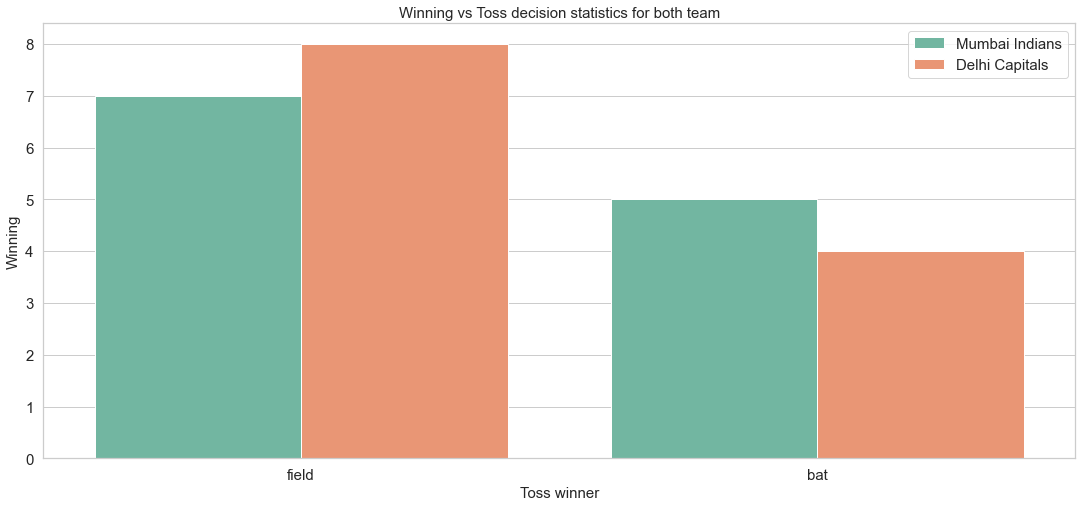

In [448]:
#Overall 

sns.set(style='whitegrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(DM['toss_decision'],palette='Set2',hue=DM['winner'])
plt.title('Winning vs Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Winning',fontsize=15)
plt.legend(loc=1,fontsize=15)

#### Recent Records Analysis

Because according to new lineup of Delhi Capitals most of them are signed in 2018 and there are also many changes in the lineup in past 1-2 years.

In [443]:
cond1 = DM["season"] == 2018
cond2 = DM["season"] == 2019
final = DM[cond1 | cond2]
final

,season,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
644,2018,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,7,JJ Roy,Wankhede Stadium
690,2018,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,normal,Delhi Capitals,11,0,A Mishra,Feroz Shah Kotla
698,2019,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,Delhi Capitals,37,0,RR Pant,Wankhede Stadium
729,2019,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground


In [444]:
final.player_of_match.value_counts()

A Mishra     1
RR Pant      1
JJ Roy       1
HH Pandya    1
Name: player_of_match, dtype: int64

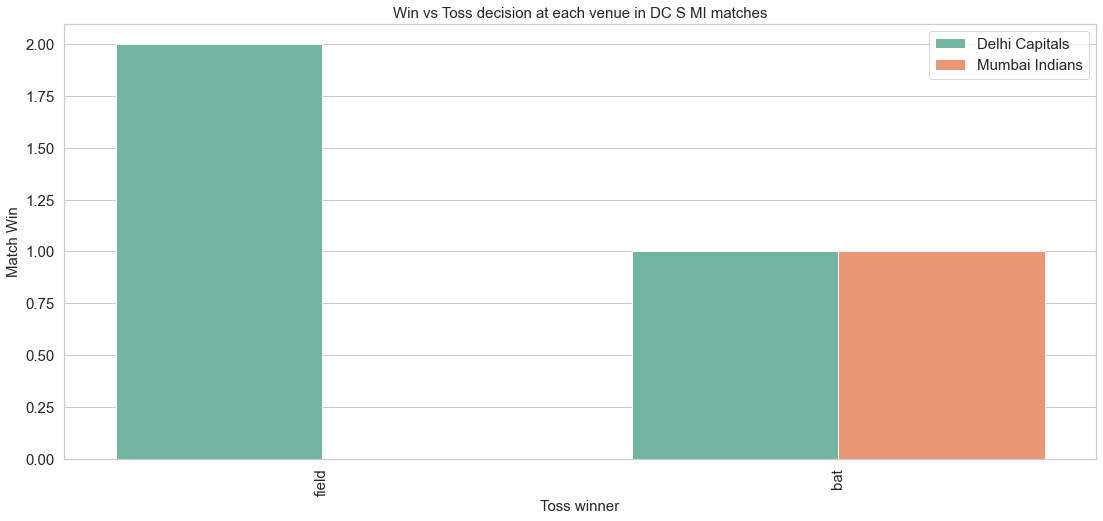

In [447]:
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(final['toss_decision'],palette='Set2',hue=final['winner'])
plt.title('Win vs Toss decision at each venue in DC S MI matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Win',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

From all these analysis we can see that Mumbai Indians should be favorite if they Bat first (seeing their overall performance against Delhi) and Delhi Capitals will be favorite if they bat second. 

But taking in consideration the recent form of both teams we predict that Delhi Capitals should be favorite if they bat first also because the records of Mumbai Indians chasing score is really bad .

So , we conclude that there are higher chances of Delhi Capitals to win today's match.